In [3]:
# imports and loading
import os
import sys
sys.path.insert(0, '../functions/')
import create_data_for_single_gene as cdg
import interface_GAMS as iG

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

case = 'fadR'

if not os.path.exists('../data/case_to_mRNA_passed.pkl'):
    case_to_mRNA_passed = {}
else:
    pickle_in = open('../data/case_to_mRNA_passed.pkl', 'rb')
    case_to_mRNA_passed = pickle.load(pickle_in)
    pickle_in.close()

if case == 'argR':
    limit_genes = ['b2818', 'b3959', 'b3958', 'b3359', 'b3957', 'b0273', 'b3172', 'b3960', 'b4254']
elif case == 'fadR':
    limit_genes = ['b3255', 'b1288', 'b0185', 'b3256', 'b2316']
flags_df = pd.read_csv('../data/saved_flags.csv', index_col = 0)
    
# for argR mRNA - passed:
mRNA_passed = ['starve_series__t00_growth1__1',
 'starve_series__t00_growth1__2',
 'starve_series__t00_growth1__3',
 'starve_series__t00_growth1__4',
 'starve_series__t02_starve__1',
 'starve_series__t02_starve__2',
 'starve_series__t03_starve__1',
 'starve_series__t03_starve__2',
 'starve_series__t04_starve__1',
 'starve_series__t04_starve__2',
 'starve_series__t05_starve__1',
 'starve_series__t05_starve__2',
 'starve_series__t06_starve__1',
 'starve_series__t06_starve__2',
 'starve_series__t07_starve__1',
 'starve_series__t07_starve__2',
 'starve_series__t08_starve__1',
 'starve_series__t08_starve__2',
 'starve_series__t09_starve__1',
 'starve_series__t09_starve__2',
 'starve_series__t10_starve__1',
 'starve_series__t10_starve__2',
 'starve_series__t11_starve__1',
 'starve_series__t11_starve__2',
 'starve_series__t12_starve__1',
 'starve_series__t12_starve__2',
 'starve_series__t14_starve__1',
 'starve_series__t14_starve__2',
 'starve_series__t16_starve__1',
 'starve_series__t16_starve__2',
 'starve_series__t17_starve__1',
 'starve_series__t17_starve__2',
 'starve_series__t18_starve__1',
 'starve_series__t18_starve__2',
 'starve_series__t22_growth2__1',
 'starve_series__t22_growth2__2',
 'starve_series__t26_growth2__1',
 'starve_series__t27_growth2__1',
 'starve_series__t27_growth2__2',
 'starve_series__t28_growth2__1',
 'starve_series__t28_growth2__2',
 'control__wt_glc__1',
 'control__wt_glc__2',
 'fur__wt_dpd__1',
 'fur__wt_dpd__2',
 'fur__wt_fe__1',
 'fur__wt_fe__2',
 'fur__delfur_dpd__1',
 'fur__delfur_dpd__2',
 'fur__delfur_fe2__1',
 'fur__delfur_fe2__2',
 'acid__wt_ph5__1',
 'acid__wt_ph5__2',
 'acid__delgadx_ph5__1',
 'acid__delgadx_ph5__2',
 'acid__delgadw_ph5__1',
 'acid__delgadw_ph5__2',
 'acid__delgade_ph5__1',
 'acid__delgade_ph5__2',
 'oxidative__wt_pq__1',
 'oxidative__wt_pq__2',
 'oxidative__deloxyr_pq__1',
 'oxidative__deloxyr_pq__2',
 'oxidative__delsoxr_pq__1',
 'oxidative__delsoxr_pq__2',
 'oxidative__delsoxs_pq__1',
 'oxidative__delsoxs_pq__2',
 'nac_ntrc__wt_csn__1',
 'nac_ntrc__wt_csn__2',
 'nac_ntrc__wt_gln__1',
 'nac_ntrc__wt_gln__2',
 'nac_ntrc__bw_delnac_csn__1',
 'nac_ntrc__bw_delnac_csn__2',
 'nac_ntrc__bw_delnac_gln__1',
 'nac_ntrc__bw_delnac_gln__2',
 'nac_ntrc__bw_delnac_nh4__1',
 'nac_ntrc__bw_delnac_nh4__2',
 'misc__wt_no_te__1',
 'misc__wt_no_te__2',
 'misc__bw_delcbl__1',
 'misc__bw_delcbl__2',
 'misc__bw_delfabr__1',
 'misc__bw_delfabr__2',
 'misc__bw_delfadr__1',
 'misc__bw_delfadr__2',
 'misc__nitr_031__1',
 'omics__wt_glu__1',
 'omics__wt_glu__2',
 'omics__wt_gly__1',
 'omics__wt_gly__2',
 'omics__wt_thr__1',
 'omics__wt_thr__2',
 'omics__bw_ac__1',
 'omics__bw_ac__2',
 'omics__bw_fum__1',
 'omics__bw_fum__2',
 'omics__bw_glc__1',
 'omics__bw_glc__2',
 'omics__bw_pyr__1',
 'omics__bw_pyr__2',
 'ompr__wt_nacl__1',
 'ompr__wt_nacl__2',
 'minspan__wt_ade__1',
 'minspan__wt_glc__1',
 'minspan__wt_glc__2',
 'minspan__wt_glc__3',
 'minspan__wt_glc__4',
 'minspan__wt_glc_anaero__1',
 'minspan__wt_glc_anaero__2',
 'minspan__wt_trp__1',
 'minspan__bw_delcra_glc__1',
 'minspan__bw_delcra_glc__2',
 'minspan__bw_delmntr__1',
 'minspan__bw_delnac_ade__1',
 'minspan__bw_delnac_glc__1',
 'cra_crp__wt_ac__1',
 'cra_crp__wt_ac__2',
 'cra_crp__wt_fru__1',
 'cra_crp__wt_fru__2',
 'cra_crp__delcra_ac__1',
 'cra_crp__delcra_ac__2',
 'cra_crp__delcra_fru__1',
 'cra_crp__delcra_fru__2',
 'cra_crp__delcra_glc__1',
 'cra_crp__delcra_glc__2',
 'rpoB__wt_031__1',
 'rpoB__wt_044__1',
 'rpoB__wt_lb__1',
 'rpoB__wt_lb__2',
 'rpoB__rpoBE546V_031__1',
 'rpoB__rpoBE546V_044__1',
 'rpoB__rpoBE546V_lb__1',
 'rpoB__rpoBE546V_lb__2',
 'rpoB__rpoBE546V_glc__1',
 'rpoB__rpoBE672K_glc__1',
 'rpoB__rpoBE672K_glc__2',
 'rpoB__rpoBE672K_lb__1',
 'rpoB__rpoBE672K_lb__2',
 'crp__wt_fru__1',
 'crp__delar1_glyc__1',
 'crp__delar1_glyc__2',
 'crp__delar1ar2_glyc__1',
 'crp__delar1ar2_glyc__2',
 'crp__delar1ar2_glyc__3',
 'crp__delar2_glyc__1',
 'crp__delar2_glyc__2',
 'crp__delar2_glyc__3',
 'crp__delcrp_fru__1',
 'crp__delcrp_fru__2',
 'crp__delcrp_fru__3',
 'crp__delcrp_glc__1',
 'crp__delcrp_glc__2',
 'crp__delcrp_glc__3',
 'crp__delcrp_glyc__1',
 'crp__delcrp_glyc__2',
 'crp__delcrp_glyc__3',
 'glu__glu_ale3__1',
 'glu__glu_ale4__1',
 'glu__glu_ale5__1',
 'glu__glu_ale6__1',
 'glu__glu_ale8__1',
 'glu__glu_ale9__1',
 'glu__glu_ale10__1',
 '42c__wt_42c__1',
 '42c__42c_ale1__1',
 '42c__42c_ale2__1',
 '42c__42c_ale3__1',
 '42c__42c_ale4__1',
 '42c__42c_ale5__1',
 '42c__42c_ale6__1',
 '42c__42c_ale8__1',
 '42c__42c_ale9__1',
 '42c__42c_ale10__1',
 'ssw__wt_ac__1',
 'ssw__wt_glc__1',
 'ssw__wt_glyc__1',
 'ssw__wt_xyl__1',
 'ssw__glc_ale1__1',
 'ssw__glc_ale2__1',
 'ssw__glc_ale3__1',
 'ssw__glyc_ale1__1',
 'ssw__glyc_ale2__1',
 'ssw__xyl_ale1__1',
 'ssw__xyl_ale2__1',
 'ssw__xyl_ale3__1',
 'ssw__glc_ac_ac2__1',
 'ssw__glc_ac_glc1__1',
 'ssw__glc_ac_glc2__1',
 'ssw__glc_glyc_glc__1',
 'ssw__glc_glyc_glyc__1',
 'ssw__glc_xyl_xyl__1',
 'pgi__glu4_delpgi__1',
 'pgi__pgi_ale1__1',
 'pgi__pgi_ale2__1',
 'pgi__pgi_ale3__1',
 'pgi__pgi_ale5__1',
 'pgi__pgi_ale6__1',
 'pgi__pgi_ale7__1',
 'pgi__pgi_ale8__1',
 'ica__wt_glc__1',
 'ica__wt_glc__2',
 'ica__wt_glc__3',
 'ica__wt_glc__4',
 'ica__arg_sbt__1',
 'ica__arg_sbt__2',
 'ica__cytd_rib__1',
 'ica__cytd_rib__2',
 'ica__gth__1',
 'ica__gth__2',
 'ica__leu_glcr__1',
 'ica__leu_glcr__2',
 'ica__met_glc__1',
 'ica__met_glc__2',
 'ica__no3_anaero__1',
 'ica__no3_anaero__2',
 'ica__phe_acgam__1',
 'ica__phe_acgam__2',
 'ica__thm_gal__1',
 'ica__thm_gal__2',
 'ica__tyr_glcn__1',
 'ica__tyr_glcn__2',
 'ica__ura_pyr__1',
 'ica__ura_pyr__2',
 'ica__wt_glc__5',
 'ica__wt_glc__6',
 'ica__ade_glc__1',
 'ica__ade_glc__2',
 'ytf__wt_glc__1',
 'ytf__wt_glc__2',
 'ytf__delyafC__2',
 'ytf__delyeiE__1',
 'ytf__delyeiE__2',
 'ytf__delyiaJ__1',
 'ytf__delyiaJ__2',
 'ytf__delyieP__1',
 'ytf__delyieP__2',
 'ytf__wt_ph5__1',
 'ytf__wt_ph5__2',
 'ytf__wt_ph8__1',
 'ytf__wt_ph8__2',
 'ytf__delybaO__1',
 'ytf__delybaO__2',
 'ytf__delybaQ__1',
 'ytf__delybaQ__2',
 'ytf__delybiH__1',
 'ytf__delybiH__2',
 'ytf__delydcI_ph5__1',
 'ytf__delydcI_ph5__2',
 'ytf__delydcI_ph8__1',
 'ytf__delydcI_ph8__2',
 'ytf__delyddM__1',
 'ytf__delyddM__2',
 'ytf__delyheO__1',
 'ytf__delyheO__2',
 'fps__bw_glc__1',
 'fps__bw_glc__2',
 'fps__fps_thrA_ale1__1',
 'fps__fps_thrA_ale1__2',
 'fps__fps_thrA_ale2__1',
 'fps__fps_thrA_ale2__2',
 'fps__fps_serB_ale1__1',
 'fps__fps_serB_ale1__2',
 'fps__fps_serB_ale4__1',
 'fps__fps_serB_ale4__2',
 'pal__lyx_ale2_f6__1',
 'pal__lyx_ale2__1',
 'pal__lyx_ale2__2',
 'pal__lyx_ale4__1',
 'pal__lyx_ale4__2',
 'pal__5drib_ale10_f18__1',
 'pal__5drib_ale10_f18__2',
 'pal__5drib_ale10__1',
 'pal__arab_ale14_f9__1',
 'pal__arab_ale14_f9__2',
 'pal__arab_ale14__1',
 'pal__arab_ale14__2',
 'pal__arab_ale16__1',
 'pal__arab_ale16__2',
 'pal__tartr_ale26_f10__1',
 'pal__tartr_ale26_f10__2',
 'pal__tartr_ale26__1',
 'pal__tartr_ale26__2',
 'pal__tartr_ale28_f10__2',
 'pal__tartr_ale28__1',
 'pal__tartr_ale28__2',
 'efeU__delmenFentC_citr__1',
 'efeU__delmenFentC_citr__2',
 'efeU__delmenFentC__1',
 'efeU__delmenFentC__2',
 'efeU__menFentC_ale39__1',
 'efeU__menFentC_ale39__2',
 'efeU__menFentC_ale29__1',
 'efeU__menFentC_ale29__2',
 'efeU__menFentC_ale30__1',
 'efeU__menFentC_ale30__2',
 'efeU__menFentCubiC_ale36__1',
 'efeU__menFentCubiC_ale36__2',
 'efeU__menFentCubiC_ale37__1',
 'efeU__menFentCubiC_ale37__2',
 'efeU__menFentCubiC_ale38__1',
 'efeU__menFentCubiC_ale38__2']

# further filtered based on which model well and which don't, haven't quite figured out the difference other than high expression
mRNA_passed = ['starve_series__t14_starve__2',
 'cra_crp__delcra_ac__1',
 'ica__wt_glc__4',
 'starve_series__t09_starve__2',
 'rpoB__rpoBE546V_lb__2',
 'efeU__delmenFentC__1',
 'pgi__pgi_ale2__1',
 'starve_series__t06_starve__2',
 'ytf__delybaQ__1',
 'ica__tyr_glcn__2',
 'rpoB__rpoBE546V_glc__1',
 'ica__wt_glc__5',
 'starve_series__t18_starve__2',
 'crp__delar1ar2_glyc__3',
 'minspan__bw_delnac_ade__1',
 'ssw__glc_glyc_glyc__1',
 'ssw__wt_glyc__1',
 'ytf__delyieP__1',
 'ssw__glyc_ale2__1',
 'rpoB__rpoBE672K_lb__1',
 'efeU__menFentCubiC_ale38__1',
 'ytf__wt_glc__2',
 'rpoB__rpoBE672K_lb__2',
 'ica__gth__1',
 'misc__nitr_031__1',
 'starve_series__t22_growth2__1',
 'minspan__wt_glc_anaero__2',
 'efeU__delmenFentC_citr__1',
 'efeU__menFentC_ale30__2',
 'crp__delcrp_fru__1',
 'ssw__glc_xyl_xyl__1',
 'minspan__wt_ade__1',
 'pgi__pgi_ale7__1',
 'ica__phe_acgam__1',
 'crp__delcrp_glyc__2',
 'ytf__delyeiE__2',
 'starve_series__t11_starve__1',
 'ica__thm_gal__1',
 'starve_series__t00_growth1__3',
 'ytf__delybaO__2',
 'acid__wt_ph5__2',
 'pal__lyx_ale4__2',
 'starve_series__t16_starve__2',
 'starve_series__t02_starve__1',
 'ytf__delydcI_ph8__2',
 'ssw__wt_xyl__1',
 'starve_series__t10_starve__1',
 'ssw__wt_glc__1',
 'starve_series__t22_growth2__2',
 'efeU__menFentC_ale29__2',
 'nac_ntrc__bw_delnac_nh4__1',
 'starve_series__t05_starve__1',
 'starve_series__t18_starve__1',
 'ica__wt_glc__2',
 'misc__wt_no_te__2',
 'oxidative__delsoxs_pq__1',
 'efeU__menFentCubiC_ale38__2',
 'rpoB__wt_031__1',
 'efeU__menFentC_ale39__1',
 'efeU__menFentC_ale39__2',
 'fur__wt_dpd__2',
 'glu__glu_ale8__1',
 'nac_ntrc__bw_delnac_gln__1',
 'starve_series__t08_starve__1',
 'pal__lyx_ale2__2',
 'ytf__delyieP__2',
 'ica__wt_glc__6',
 'starve_series__t05_starve__2',
 'starve_series__t03_starve__2',
 'nac_ntrc__bw_delnac_nh4__2',
 'misc__bw_delfadr__1',
 'efeU__menFentC_ale29__1',
 'fps__fps_serB_ale1__1',
 'ssw__glc_ac_glc2__1',
 'nac_ntrc__wt_gln__1',
 'pal__tartr_ale26__1',
 'ssw__glyc_ale1__1',
 'starve_series__t12_starve__2',
 'ytf__delybaQ__2',
 'ica__phe_acgam__2',
 'nac_ntrc__bw_delnac_gln__2',
 'ica__leu_glcr__1',
 'nac_ntrc__wt_gln__2',
 'ytf__delydcI_ph5__1',
 'fur__wt_dpd__1',
 'cra_crp__delcra_ac__2',
 'efeU__menFentCubiC_ale37__2',
 'ytf__delyiaJ__2',
 'ytf__delybiH__1',
 'ssw__xyl_ale1__1',
 'starve_series__t07_starve__2',
 'pal__tartr_ale26__2',
 'crp__delcrp_fru__3',
 'starve_series__t12_starve__1',
 'ompr__wt_nacl__2',
 'pgi__glu4_delpgi__1',
 'starve_series__t04_starve__1',
 'ica__cytd_rib__1',
 'starve_series__t11_starve__2',
 'pal__arab_ale16__1',
 'ica__tyr_glcn__1',
 '42c__42c_ale4__1',
 'starve_series__t16_starve__1',
 'ytf__delybiH__2',
 'ica__leu_glcr__2',
 'minspan__bw_delnac_glc__1',
 'fps__fps_serB_ale4__2',
 'ica__arg_sbt__2',
 'ytf__delyddM__2',
 'ica__ura_pyr__2',
 'starve_series__t02_starve__2',
 'oxidative__delsoxr_pq__2',
 'starve_series__t03_starve__1',
 'misc__wt_no_te__1',
 'ytf__delydcI_ph8__1',
 'acid__delgadx_ph5__2',
 'starve_series__t17_starve__1',
 'ytf__wt_ph8__1',
 'fur__delfur_dpd__2',
 'acid__delgade_ph5__1',
 'oxidative__deloxyr_pq__1',
 'ytf__delyiaJ__1',
 'ssw__xyl_ale2__1',
 'ytf__delyheO__2',
 'rpoB__rpoBE546V_lb__1',
 'starve_series__t07_starve__1',
 'oxidative__wt_pq__1',
 '42c__42c_ale8__1',
 'ica__thm_gal__2',
 'ytf__delyddM__1',
 'ssw__xyl_ale3__1',
 'oxidative__delsoxs_pq__2',
 'minspan__wt_glc_anaero__1',
 'crp__delcrp_glc__3',
 'rpoB__wt_lb__2',
 'minspan__wt_glc__4',
 'rpoB__wt_lb__1',
 'minspan__bw_delmntr__1',
 'pal__arab_ale14_f9__1',
 'pal__arab_ale14_f9__2',
 'pgi__pgi_ale3__1',
 'pal__lyx_ale2_f6__1',
 'efeU__menFentCubiC_ale37__1',
 'ytf__delyeiE__1',
 'oxidative__wt_pq__2',
 'fur__delfur_fe2__2',
 'omics__bw_fum__1',
 'starve_series__t04_starve__2',
 'ssw__wt_ac__1',
 'crp__delar2_glyc__3',
 'starve_series__t06_starve__1',
 'acid__delgadw_ph5__1',
 'crp__delcrp_glyc__3',
 'crp__delar1ar2_glyc__2',
 'starve_series__t14_starve__1',
 'ica__arg_sbt__1',
 'starve_series__t09_starve__1',
 'oxidative__deloxyr_pq__2',
 'starve_series__t17_starve__2',
 'ica__cytd_rib__2'] 
# further filtered using same procedure
mRNA_passed = ['42c__42c_ale4__1',
 'acid__delgade_ph5__1',
 'acid__delgadw_ph5__1',
 'acid__wt_ph5__2',
 'cra_crp__delcra_ac__1',
 'cra_crp__delcra_ac__2',
 'crp__delar2_glyc__3',
 'crp__delcrp_fru__1',
 'crp__delcrp_glc__3',
 'crp__delcrp_glyc__2',
 'crp__delcrp_glyc__3',
 'efeU__delmenFentC__1',
 'efeU__menFentC_ale29__1',
 'efeU__menFentC_ale29__2',
 'efeU__menFentC_ale39__1',
 'efeU__menFentC_ale39__2',
 'efeU__menFentCubiC_ale37__2',
 'efeU__menFentCubiC_ale38__1',
 'efeU__menFentCubiC_ale38__2',
 'fps__fps_serB_ale4__2',
 'fur__delfur_dpd__2',
 'fur__delfur_fe2__2',
 'fur__wt_dpd__1',
 'fur__wt_dpd__2',
 'glu__glu_ale8__1',
 'ica__arg_sbt__1',
 'ica__cytd_rib__1',
 'ica__cytd_rib__2',
 'ica__gth__1',
 'ica__leu_glcr__1',
 'ica__leu_glcr__2',
 'ica__phe_acgam__2',
 'ica__thm_gal__1',
 'ica__thm_gal__2',
 'ica__ura_pyr__2',
 'ica__wt_glc__5',
 'minspan__bw_delmntr__1',
 'minspan__bw_delnac_ade__1',
 'minspan__bw_delnac_glc__1',
 'minspan__wt_ade__1',
 'minspan__wt_glc__4',
 'minspan__wt_glc_anaero__1',
 'minspan__wt_glc_anaero__2',
 'misc__nitr_031__1',
 'misc__wt_no_te__1',
 'misc__wt_no_te__2',
 'nac_ntrc__bw_delnac_gln__1',
 'nac_ntrc__bw_delnac_gln__2',
 'nac_ntrc__wt_gln__1',
 'nac_ntrc__wt_gln__2',
 'ompr__wt_nacl__2',
 'oxidative__deloxyr_pq__1',
 'oxidative__deloxyr_pq__2',
 'oxidative__delsoxr_pq__2',
 'oxidative__delsoxs_pq__1',
 'oxidative__delsoxs_pq__2',
 'oxidative__wt_pq__1',
 'oxidative__wt_pq__2',
 'pal__arab_ale14_f9__1',
 'pal__arab_ale14_f9__2',
 'pal__arab_ale16__1',
 'pal__lyx_ale2__2',
 'pal__lyx_ale2_f6__1',
 'pal__lyx_ale4__2',
 'pal__tartr_ale26__1',
 'pgi__pgi_ale2__1',
 'rpoB__rpoBE546V_lb__1',
 'rpoB__rpoBE546V_lb__2',
 'rpoB__rpoBE672K_lb__1',
 'rpoB__rpoBE672K_lb__2',
 'rpoB__wt_031__1',
 'rpoB__wt_lb__1',
 'rpoB__wt_lb__2',
 'ssw__glc_glyc_glyc__1',
 'ssw__glyc_ale1__1',
 'ssw__glyc_ale2__1',
 'ssw__wt_ac__1',
 'ssw__wt_glc__1',
 'ssw__wt_glyc__1',
 'ssw__wt_xyl__1',
 'ssw__xyl_ale1__1',
 'ssw__xyl_ale3__1',
 'starve_series__t00_growth1__3',
 'starve_series__t02_starve__1',
 'starve_series__t02_starve__2',
 'starve_series__t03_starve__1',
 'starve_series__t04_starve__2',
 'starve_series__t06_starve__1',
 'starve_series__t06_starve__2',
 'starve_series__t07_starve__1',
 'starve_series__t08_starve__1',
 'starve_series__t09_starve__1',
 'starve_series__t09_starve__2',
 'starve_series__t10_starve__1',
 'starve_series__t11_starve__1',
 'starve_series__t11_starve__2',
 'starve_series__t12_starve__1',
 'starve_series__t12_starve__2',
 'starve_series__t14_starve__1',
 'starve_series__t14_starve__2',
 'starve_series__t16_starve__1',
 'starve_series__t16_starve__2',
 'starve_series__t17_starve__1',
 'starve_series__t17_starve__2',
 'starve_series__t18_starve__1',
 'starve_series__t18_starve__2',
 'starve_series__t22_growth2__1',
 'starve_series__t22_growth2__2',
 'ytf__delybaO__2',
 'ytf__delybaQ__1',
 'ytf__delybiH__1',
 'ytf__delybiH__2',
 'ytf__delydcI_ph5__1',
 'ytf__delydcI_ph8__1',
 'ytf__delyddM__1',
 'ytf__delyddM__2',
 'ytf__delyeiE__1',
 'ytf__delyeiE__2',
 'ytf__delyiaJ__2',
 'ytf__delyieP__1',
 'ytf__delyieP__2']
# again
mRNA_passed = ['42c__42c_ale10__1',
 '42c__42c_ale3__1',
 '42c__42c_ale4__1',
 '42c__42c_ale5__1',
 '42c__42c_ale8__1',
 '42c__wt_42c__1',
 'acid__delgade_ph5__1',
 'acid__delgadw_ph5__1',
 'acid__delgadw_ph5__2',
 'acid__delgadx_ph5__1',
 'acid__delgadx_ph5__2',
 'acid__wt_ph5__1',
 'acid__wt_ph5__2',
 'cra_crp__delcra_ac__1',
 'cra_crp__delcra_ac__2',
 'cra_crp__delcra_fru__1',
 'cra_crp__wt_ac__1',
 'cra_crp__wt_ac__2',
 'cra_crp__wt_fru__1',
 'cra_crp__wt_fru__2',
 'crp__delar1_glyc__1',
 'crp__delar1_glyc__2',
 'crp__delar2_glyc__2',
 'crp__delar2_glyc__3',
 'crp__delcrp_fru__1',
 'crp__delcrp_fru__2',
 'crp__delcrp_fru__3',
 'crp__delcrp_glc__1',
 'crp__delcrp_glc__2',
 'crp__delcrp_glc__3',
 'crp__delcrp_glyc__1',
 'crp__delcrp_glyc__2',
 'crp__delcrp_glyc__3',
 'efeU__delmenFentC__1',
 'efeU__delmenFentC__2',
 'efeU__delmenFentC_citr__1',
 'efeU__delmenFentC_citr__2',
 'efeU__menFentC_ale29__1',
 'efeU__menFentC_ale29__2',
 'efeU__menFentC_ale30__2',
 'efeU__menFentC_ale39__1',
 'efeU__menFentC_ale39__2',
 'efeU__menFentCubiC_ale36__2',
 'efeU__menFentCubiC_ale37__1',
 'efeU__menFentCubiC_ale37__2',
 'efeU__menFentCubiC_ale38__1',
 'efeU__menFentCubiC_ale38__2',
 'fps__fps_serB_ale1__1',
 'fps__fps_serB_ale4__1',
 'fps__fps_serB_ale4__2',
 'fps__fps_thrA_ale1__1',
 'fps__fps_thrA_ale1__2',
 'fur__delfur_dpd__1',
 'fur__delfur_dpd__2',
 'fur__delfur_fe2__1',
 'fur__delfur_fe2__2',
 'fur__wt_dpd__1',
 'fur__wt_dpd__2',
 'glu__glu_ale8__1',
 'ica__arg_sbt__1',
 'ica__arg_sbt__2',
 'ica__cytd_rib__1',
 'ica__cytd_rib__2',
 'ica__gth__1',
 'ica__gth__2',
 'ica__leu_glcr__1',
 'ica__leu_glcr__2',
 'ica__met_glc__1',
 'ica__met_glc__2',
 'ica__phe_acgam__1',
 'ica__phe_acgam__2',
 'ica__thm_gal__1',
 'ica__thm_gal__2',
 'ica__tyr_glcn__1',
 'ica__tyr_glcn__2',
 'ica__ura_pyr__1',
 'ica__ura_pyr__2',
 'ica__wt_glc__1',
 'ica__wt_glc__2',
 'ica__wt_glc__3',
 'ica__wt_glc__4',
 'ica__wt_glc__5',
 'ica__wt_glc__6',
 'minspan__bw_delmntr__1',
 'minspan__bw_delnac_ade__1',
 'minspan__bw_delnac_glc__1',
 'minspan__wt_ade__1',
 'minspan__wt_glc__1',
 'minspan__wt_glc__2',
 'minspan__wt_glc__3',
 'minspan__wt_glc__4',
 'minspan__wt_glc_anaero__1',
 'minspan__wt_glc_anaero__2',
 'minspan__wt_trp__1',
 'misc__nitr_031__1',
 'misc__wt_no_te__1',
 'misc__wt_no_te__2',
 'nac_ntrc__bw_delnac_csn__1',
 'nac_ntrc__bw_delnac_csn__2',
 'nac_ntrc__bw_delnac_gln__1',
 'nac_ntrc__bw_delnac_gln__2',
 'nac_ntrc__wt_cytd__1',
 'nac_ntrc__wt_cytd__2',
 'nac_ntrc__wt_gln__1',
 'nac_ntrc__wt_gln__2',
 'omics__bw_ac__1',
 'omics__bw_ac__2',
 'omics__bw_fum__1',
 'omics__bw_fum__2',
 'omics__wt_glu__2',
 'omics__wt_gly__1',
 'omics__wt_gly__2',
 'ompr__wt_nacl__1',
 'ompr__wt_nacl__2',
 'oxidative__deloxyr_pq__1',
 'oxidative__deloxyr_pq__2',
 'oxidative__delsoxr_pq__1',
 'oxidative__delsoxr_pq__2',
 'oxidative__delsoxs_pq__1',
 'oxidative__delsoxs_pq__2',
 'oxidative__wt_pq__1',
 'oxidative__wt_pq__2',
 'pal__arab_ale14__1',
 'pal__arab_ale14__2',
 'pal__arab_ale14_f9__1',
 'pal__arab_ale14_f9__2',
 'pal__arab_ale16__1',
 'pal__arab_ale16__2',
 'pal__lyx_ale2__1',
 'pal__lyx_ale2__2',
 'pal__lyx_ale2_f6__1',
 'pal__lyx_ale4__1',
 'pal__lyx_ale4__2',
 'pal__tartr_ale26__1',
 'pal__tartr_ale26__2',
 'pal__tartr_ale26_f10__1',
 'pal__tartr_ale28__1',
 'pal__tartr_ale28__2',
 'pal__tartr_ale28_f10__2',
 'pgi__glu4_delpgi__1',
 'pgi__pgi_ale1__1',
 'pgi__pgi_ale2__1',
 'pgi__pgi_ale3__1',
 'pgi__pgi_ale6__1',
 'pgi__pgi_ale7__1',
 'pgi__pgi_ale8__1',
 'rpoB__rpoBE546V_glc__1',
 'rpoB__rpoBE546V_lb__1',
 'rpoB__rpoBE546V_lb__2',
 'rpoB__rpoBE672K_lb__1',
 'rpoB__rpoBE672K_lb__2',
 'rpoB__wt_031__1',
 'rpoB__wt_lb__1',
 'rpoB__wt_lb__2',
 'ssw__glc_ac_ac2__1',
 'ssw__glc_ac_glc1__1',
 'ssw__glc_ac_glc2__1',
 'ssw__glc_glyc_glyc__1',
 'ssw__glc_xyl_xyl__1',
 'ssw__glyc_ale1__1',
 'ssw__glyc_ale2__1',
 'ssw__wt_ac__1',
 'ssw__wt_glc__1',
 'ssw__wt_glyc__1',
 'ssw__wt_xyl__1',
 'ssw__xyl_ale1__1',
 'ssw__xyl_ale2__1',
 'ssw__xyl_ale3__1',
 'starve_series__t00_growth1',
 'starve_series__t01_starve',
 'starve_series__t02_starve',
 'starve_series__t03_starve',
 'starve_series__t04_starve',
 'starve_series__t05_starve',
 'starve_series__t06_starve',
 'starve_series__t07_starve',
 'starve_series__t08_starve',
 'starve_series__t09_starve',
 'starve_series__t10_starve',
 'starve_series__t11_starve',
 'starve_series__t12_starve',
 'starve_series__t14_starve',
 'starve_series__t16_starve',
 'starve_series__t17_starve',
 'starve_series__t18_starve',
 'starve_series__t22_growth2',
 'starve_series__t23_growth2',
 'starve_series__t27_growth2',
 'starve_series__t28_growth2',
 'ytf__delybaO__2',
 'ytf__delybaQ__1',
 'ytf__delybaQ__2',
 'ytf__delybiH__1',
 'ytf__delybiH__2',
 'ytf__delydcI_ph5__1',
 'ytf__delydcI_ph5__2',
 'ytf__delydcI_ph8__1',
 'ytf__delydcI_ph8__2',
 'ytf__delyddM__1',
 'ytf__delyddM__2',
 'ytf__delyeiE__1',
 'ytf__delyeiE__2',
 'ytf__delyheO__2',
 'ytf__delyiaJ__1',
 'ytf__delyiaJ__2',
 'ytf__delyieP__1',
 'ytf__delyieP__2',
 'ytf__wt_glc__1',
 'ytf__wt_glc__2',
 'ytf__wt_ph5__1',
 'ytf__wt_ph8__1',
 'ytf__wt_ph8__2']

# some custom changing
for val in ['starve_series__t07_starve', 'starve_series__t05_starve', 'starve_series__t05_starve']:
    if val in mRNA_passed:
        mRNA_passed.remove(val)
        
# metabolite data is bad for these so ignore them
for val in ['starve_series__t04_starve', 'starve_series__t04_starve']:
    if val in mRNA_passed:
        mRNA_passed.remove(val)      
        

In [4]:
# the code keeps training on extreme outliers, let's see if we can identify and trim some of them out

# let's load in a bunch of useful results
run_vals = [int(f.split('_')[1]) for f in os.listdir('../GAMs/runs/') if 'run_' in f]
GAMs_run_dir = '../GAMs/runs/run_'+str(max(run_vals))
calc_cAct, cAct_kd_df, cAct_TF_conc_df, calc_cInh, cInh_kd_df, cInh_TF_conc_df = iG.read_GAMs(GAMs_run_dir)

GA_cAct = pd.read_csv(GAMs_run_dir+'/input_files/composite_cAct_vals.csv', index_col = 0)
GA_cInh = pd.read_csv(GAMs_run_dir+'/input_files/composite_cInh_vals.csv', index_col = 0)

ratios_df = pd.read_csv(GAMs_run_dir+'/input_files/actual_mRNA_ratio.csv', index_col = 0)

C:\Users\SBRG_2024\AppData\Local\Temp\ipykernel_16352\1165473224.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


Number of cluster:  8


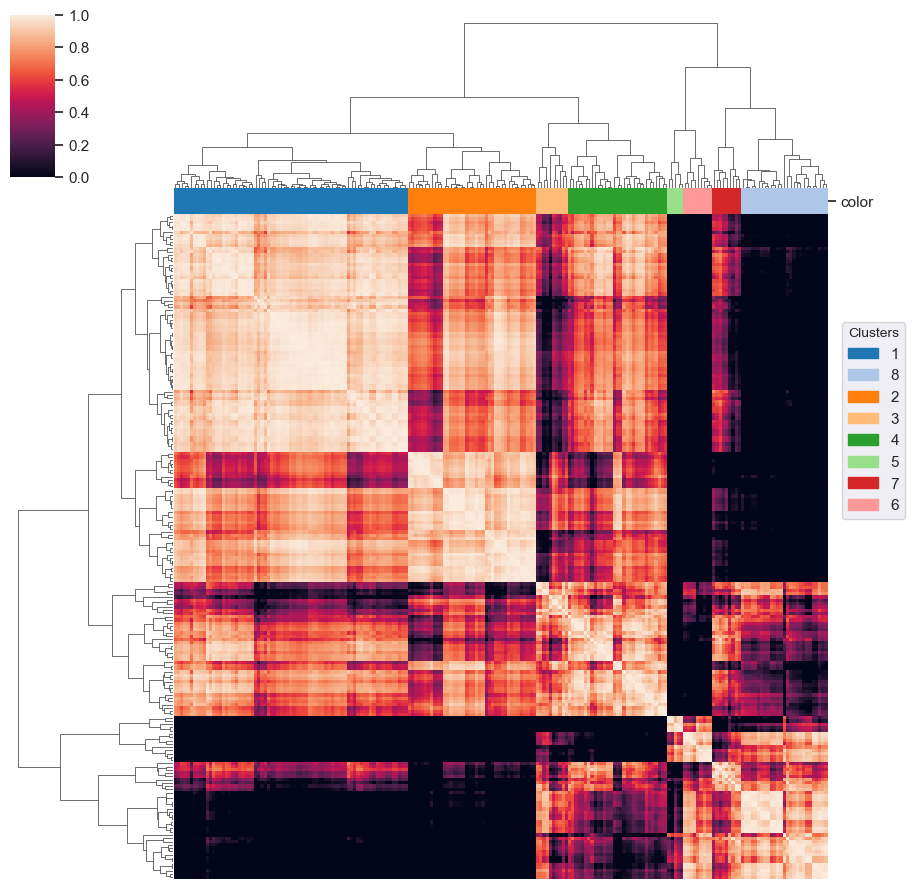

In [11]:
# start by looking at outliers in mRNA terms
data = ratios_df[limit_genes].T.corr()
#passed = data.columns

# stolen from modulome-workflow
def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

clusters = global_clustering(data.loc[passed][passed])

In [10]:
# remove clusters 
remove_clusters = [3, 11]
passed = clusters[~clusters.isin(remove_clusters)].index

In [12]:
# save
case_to_mRNA_passed.update({case : list(passed)})
pickle_out = open('../data/case_to_mRNA_passed.pkl', 'wb')
pickle.dump(case_to_mRNA_passed, pickle_out)
pickle_out.close()

In [2]:
# save
case_to_mRNA_passed.update({case : list(mRNA_passed)})
pickle_out = open('../data/case_to_mRNA_passed.pkl', 'wb')
pickle.dump(case_to_mRNA_passed, pickle_out)
pickle_out.close()

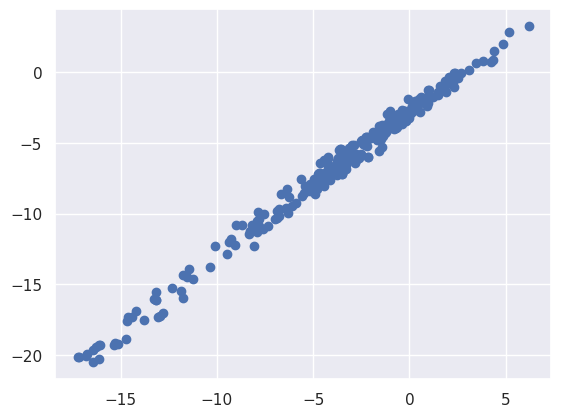

In [140]:
# trying to figure out if this zeroing stuff is legit - it seems to be!

iM_act = 0.0
iM_inh = 'ArgR'

M_df = pd.read_csv('../data/precise_1.0/M.csv', index_col = 0)
iM_table = pd.read_csv('../data/precise_1.0/iM_table.csv', index_col = 0)
M_df = M_df.rename(columns = {str(index) : row['name'] for index, row in iM_table.iterrows()})
input_parameters = dict(flags_df.loc['b2818'])
input_parameters.update({
    'include_Amy_samples' : True,
    'central_gene' : 'b2818',
})
# unload flags
gene = input_parameters['central_gene']
use_zerod_A_matrix = input_parameters['use_zerod_A_matrix']
basal_conditions = ['ytf__delyafC__1', 'ytf__delyafC__2']
    
# loading
if False:#input_parameters['include_Amy_samples']:
    # merge together log_tpm_df files
    log_tpm_df = pd.read_csv('../data/precise_1.0/log_tpm.csv', index_col = 0)
    starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv', index_col = 0)
    to_blank_inds = list(set(log_tpm_df.index) - set(starve_log_tpm.index))
    # need to create zero rows for missing values
    zeros_data = {col : 0 for col in starve_log_tpm.columns}
    zeros_df = pd.DataFrame(zeros_data, index = to_blank_inds)
    starve_log_tpm = pd.concat([starve_log_tpm, zeros_df])
    starve_log_tpm = starve_log_tpm.loc[log_tpm_df.index]
    log_tpm_df = pd.concat([starve_log_tpm, log_tpm_df], axis = 1)
else:
    log_tpm_df = pd.read_csv('../data/precise_1.0/log_tpm.csv', index_col = 0)







# straight from code
gene_iMs_df = pd.read_csv('../data/precise_1.0/gene_presence_matrix.csv', index_col = 0)
gene_iMs_df.columns = M_df.columns
if type(iM_act) == float:
    genes_to_zero = list(gene_iMs_df.index[[val for val in gene_iMs_df[[iM_inh]].T.any()]])
    iMs_to_zero = list(set(gene_iMs_df.columns) - set([iM_inh]))
elif type(iM_inh) == float:
    genes_to_zero = list(gene_iMs_df.index[[val for val in gene_iMs_df[[iM_act]].T.any()]])
    iMs_to_zero = list(set(gene_iMs_df.columns) - set([iM_act]))
else:
    genes_to_zero = list(gene_iMs_df.index[[val for val in gene_iMs_df[[iM_act, iM_inh]].T.any()]])
    iMs_to_zero = list(set(gene_iMs_df.columns) - set([iM_act, iM_inh]))

zerod_M = M_df.copy()
zerod_M.loc[genes_to_zero, iMs_to_zero] = 0
#zerod_M = zerod_M.drop(columns = ['fps__fps_ptsI_ale3__1', 'fps__fps_ptsI_ale3__2', 'fps__fps_ptsI_ale1__1', 'fps__fps_ptsI_ale1__2'])

# Calculate the inverse of DataFrame M
M_inverse = pd.DataFrame(np.linalg.pinv(zerod_M.values), zerod_M.columns, zerod_M.index)

# Solve for DataFrame A: A = M_inverse * X
#fixed_X = log_tpm_df.div(log_tpm_df[basal_conditions].mean(axis = 1), axis = 'index')
if input_parameters['basal_or_hard_val'] == 'basal':
    fixed_X = log_tpm_df.sub(log_tpm_df[basal_conditions].mean(axis = 1), axis = 'index')
else:
    fixed_X = log_tpm_df.sub(input_parameters['hard_val'], axis = 'index')
to_drop = list(set(['fps__fps_ptsI_ale3__1', 'fps__fps_ptsI_ale3__2', 'fps__fps_ptsI_ale1__1', 'fps__fps_ptsI_ale1__2']).intersection(set(fixed_X.columns)))
fixed_X = fixed_X.fillna(0).drop(columns = to_drop)
zerod_A_df = M_inverse.dot(fixed_X)

A_df = zerod_A_df
M_df = zerod_M


# make sure the zeroing is fine
raw_A_df = pd.read_csv('../data/precise_1.0/A.csv', index_col = 0)
iM_table = pd.read_csv('../data/precise_1.0/iM_table.csv', index_col = 0)
raw_A_df = raw_A_df.rename(index = {index : row['name'] for index, row in iM_table.iterrows()})


plt.scatter(raw_A_df.loc['ArgR'][A_df.columns], A_df.loc['ArgR'])
plt.show()